In [1]:
!pip install nltk
import nltk
#per risolvere un bug, altrimenti da errore
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#tokenizer
def format_sentence(sent):
  return({word: True for word in nltk.word_tokenize(sent)})

##example
format_sentence('how are you')

{'are': True, 'how': True, 'you': True}

In [19]:
import pandas as pd
total = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/20200602_Twitter_Sentiment_Analysis/movie_review.csv')
total

#group by html_id
total = total.groupby('html_id').agg(lambda x: x.tolist())
total = total.reset_index()
total

#drop other columns: only conserve text
total.columns
total = total.drop(['html_id', 'fold_id', 'cv_tag', 'sent_id'], axis=1)
total

,text,tag
0,"[warning : anyone offended by blatant , leerin...","[pos, pos, pos, pos, pos, pos, pos, pos, pos, ..."
1,[various films seen at the seattle film festiv...,"[neg, neg, neg, neg, neg, neg, neg, neg, neg, ..."
2,"[every year--every year at the festival , i wa...","[pos, pos, pos, pos, pos, pos, pos, pos, pos, ..."
3,[this is a film that i was inclined to like at...,"[neg, neg, neg, neg, neg, neg, neg, neg, neg, ..."
4,[i'm not sure i should be writing a review of ...,"[neg, neg, neg, neg, neg, neg, neg, neg, neg, ..."
...,...,...
1995,[one might expect a cathartic viewing experien...,"[neg, neg, neg, neg, neg, neg, neg, neg, neg, ..."
1996,"[susan granger's review of "" mulholland drive ...","[neg, neg, neg, neg, neg, neg, neg, neg, neg, ..."
1997,[historical epic as a genre was almost banishe...,"[pos, pos, pos, pos, pos, pos, pos, pos, pos, ..."
1998,"[all great things come to an end , and the dot...","[pos, pos, pos, pos, pos, pos, pos, pos, pos, ..."


In [34]:
#the result is a separated chunks for every reviews: 
#chunk1, chunk2, ..., sentiment
total.values

array([[list(['warning : anyone offended by blatant , leering machismo had better avoid this film .', 'or lots of blood & guts , men against men and mano-et-mano stuff .', "in other words , it's a walter hill film !", 'with a john milius script !', 'i always picture these guys getting together and producing a movie between arm-wrestling matches .', 'these films always contain male characters i have a very hard time identifying with , probably due to the likelihood that any meeting between them and me would result in my arm being ripped off and then my subsequent death by beating with said limb .', "and we got tough guys galore , here ; drug-running banditos by the dozens , all dirty and sweaty and pretty ill-tempered , overall ; a secret task force of army commandos who are in the area to cover-up ( supposedly ) any connection between the government and the drug runners ; and lots of shit-kicking texas dirt farmers who'd as soon shoot you between the eyes as look at you .", 'in particu

In [35]:
#we merge the chunks together and we obtain: 
#review, sentiment
total_text = list()
for lists in total.values:
  combines_text = ''
  for _ in lists[0]:
    combines_text = combines_text + _
  total_text.append([combines_text, lists[1][0]])

#total_text
total_text = pd.DataFrame(total_text)
total_text

,0,1
0,"warning : anyone offended by blatant , leering...",pos
1,various films seen at the seattle film festiva...,neg
2,"every year--every year at the festival , i wai...",pos
3,this is a film that i was inclined to like at ...,neg
4,i'm not sure i should be writing a review of t...,neg
...,...,...
1995,one might expect a cathartic viewing experienc...,neg
1996,"susan granger's review of "" mulholland drive ""...",neg
1997,historical epic as a genre was almost banished...,pos
1998,"all great things come to an end , and the dot-...",pos


In [37]:
total_positive = total_text.copy()
total_positive.columns
total_positive = total_positive.loc[total_positive[1] == 'pos']
#total_positive = total_positive.pop('text')
#total_positive = total_positive.drop(['fold_id', 'cv_tag', 'html_id', 'sent_id'], axis=1)
total_positive

,0,1
0,"warning : anyone offended by blatant , leering...",pos
2,"every year--every year at the festival , i wai...",pos
7,an indian runner was more than a courier .he *...,pos
8,director : penelope spheeris ( decline of west...,pos
9,* * * * * * minor plot spoilers in review * * ...,pos
...,...,...
1992,this is the best british gangster film since t...,pos
1994,one never quite knows what one is going to get...,pos
1997,historical epic as a genre was almost banished...,pos
1998,"all great things come to an end , and the dot-...",pos


In [38]:
total_negative = total_text.copy()
total_negative.columns
total_negative = total_negative.loc[total_negative[1] == 'neg']
#total_negative = total_negative.pop('text')
#total_negative = total_negative.drop(['fold_id', 'cv_tag', 'html_id', 'sent_id'], axis=1)
total_negative

,0,1
1,various films seen at the seattle film festiva...,neg
3,this is a film that i was inclined to like at ...,neg
4,i'm not sure i should be writing a review of t...,neg
5,"this review contains spoilers , but believe me...",neg
6,plot summary : the year is 2024 .the ozone lay...,neg
...,...,...
1985,alexander dumas' the three musketeers is one o...,neg
1990,the one question that eats at me after seeing ...,neg
1993,mulholland drive did very well at the cannes f...,neg
1995,one might expect a cathartic viewing experienc...,neg


In [0]:
#   tokenizer
#input: series, ?lists?
def create_dict(total_positive, total_negative):
  
  positive_reviews = list()
  #word tokenization
  for sentence in list(total_positive.values):
    positive_reviews.append([format_sentence(sentence[0]), 'pos'])
    #saves the sentence in format: [{tokenized sentence}, 'pos]
  
  negative_reviews = list()
  #word tokenization
  for sentence in list(total_negative.values):
    #print(sentence)
    negative_reviews.append([format_sentence(sentence[0]), 'neg'])
    #saves the sentence in format: [{tokenized sentence}, 'pos]
  
  return positive_reviews, negative_reviews

Xy_pos, Xy_neg = create_dict(total_positive, total_negative)

In [0]:
Xy_pos[0]

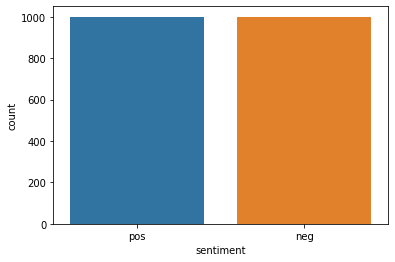

In [50]:
X = pd.concat([total_positive, total_negative], axis=0)
X.columns = ['text', 'sentiment']

import seaborn as sns
sns.countplot(x='sentiment', data=X)

y = pd.DataFrame(X.pop('sentiment'))

In [0]:
def split(pos, neg, ratio):
  train = pos[:int((1-ratio)*len(pos))] + neg[:int((1-ratio)*len(neg))]
  test = pos[int((ratio)*len(pos)):] + neg[int((ratio)*len(neg)):]
  return train, test

Xy_train, Xy_test = split(Xy_pos, Xy_neg, 0.1)

In [52]:
from nltk.classify import NaiveBayesClassifier

#encoded thorugh dictionaries
classifier = NaiveBayesClassifier.train(Xy_train)
classifier.show_most_informative_features()

Most Informative Features
               insulting = True              neg : pos    =     17.7 : 1.0
               ludicrous = True              neg : pos    =     13.4 : 1.0
                  avoids = True              pos : neg    =     12.3 : 1.0
             outstanding = True              pos : neg    =     12.3 : 1.0
                  regard = True              pos : neg    =     11.7 : 1.0
               animators = True              pos : neg    =     10.3 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                   .yeah = True              neg : pos    =     10.3 : 1.0
                    3000 = True              neg : pos    =     10.3 : 1.0
                   sucks = True              neg : pos    =      9.8 : 1.0


In [53]:
from nltk.classify.util import accuracy
print(accuracy(classifier, Xy_test))

0.9477777777777778
